In [13]:
# Paso 1: Cargar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Paso 2: Cargar el dataset
data_2 = pd.read_csv("data/recetas.csv")
print("Shape:", data_2.shape)
data_2.head()

Shape: (100, 16)


,title,servings,readyInMinutes,cookingMinutes,preparationMinutes,healthScore,spoonacularScore,pricePerServing,cheap,dairyFree,glutenFree,sustainable,vegan,vegetarian,veryHealthy,veryPopular
0,Red Lentil Soup with Chicken and Turnips,8,55,45.0,10.0,100.0,99.428001,300.45,False,True,True,False,False,False,True,True
1,Asparagus and Pea Soup: Real Convenience Food,2,20,NaN,NaN,100.0,99.417381,178.37,False,True,True,False,True,True,True,False
2,Garlicky Kale,2,45,NaN,NaN,83.0,98.943375,69.09,False,True,True,False,True,True,True,False
3,Slow Cooker Beef Stew,6,490,480.0,10.0,100.0,98.848091,270.41,False,True,True,False,False,False,True,False
4,Red Kidney Bean Jambalaya,6,45,NaN,NaN,96.0,98.818451,168.43,False,True,True,False,True,True,True,False


In [14]:
# 1. Selección de variables predictoras (X) y objetivo (y)
X = data_2[["servings", "readyInMinutes","healthScore", "glutenFree", "veryHealthy"]]
y = data_2["vegan"]

# 2. División de datos: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear modelo con balanceo de clases
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# 4. Entrenar el modelo
model.fit(X_train, y_train)

# 5. Hacer predicciones
y_pred = model.predict(X_test)

# 6. Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.60      0.50      0.55        12
        True       0.40      0.50      0.44         8

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.52      0.50      0.51        20

Matriz de Confusión:
[[6 6]
 [4 4]]


In [18]:
# 10. Predicción para nuevo individuo
nuevo_2 = pd.DataFrame({
    'servings': [5],
    'readyInMinutes': [50],
    'healthScore': [80],
    'glutenFree': [True],
    'veryHealthy': [True]
})

resultado = model.predict(nuevo_2)
print("¿Sera Vegano?", "Sí" if resultado[0] == 1 else "No")

¿Sera Vegano? No


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Paso 2: Cargar el dataset
data_3 = pd.read_csv("data/recetas.csv")
print("Shape:", data_3.shape)
data_3.head()

Shape: (100, 16)


,title,servings,readyInMinutes,cookingMinutes,preparationMinutes,healthScore,spoonacularScore,pricePerServing,cheap,dairyFree,glutenFree,sustainable,vegan,vegetarian,veryHealthy,veryPopular
0,Red Lentil Soup with Chicken and Turnips,8,55,45.0,10.0,100.0,99.428001,300.45,False,True,True,False,False,False,True,True
1,Asparagus and Pea Soup: Real Convenience Food,2,20,NaN,NaN,100.0,99.417381,178.37,False,True,True,False,True,True,True,False
2,Garlicky Kale,2,45,NaN,NaN,83.0,98.943375,69.09,False,True,True,False,True,True,True,False
3,Slow Cooker Beef Stew,6,490,480.0,10.0,100.0,98.848091,270.41,False,True,True,False,False,False,True,False
4,Red Kidney Bean Jambalaya,6,45,NaN,NaN,96.0,98.818451,168.43,False,True,True,False,True,True,True,False


In [21]:
# 1. Selección de variables predictoras (X) y objetivo (y)
X_3 = data_3[["veryHealthy", "glutenFree", "healthScore","servings", "readyInMinutes"]]
y_3 = data_3["vegan"]

In [22]:
X_3

,veryHealthy,glutenFree,healthScore,servings,readyInMinutes
0,True,True,100.0,8,55
1,True,True,100.0,2,20
2,True,True,83.0,2,45
3,True,True,100.0,6,490
4,True,True,96.0,6,45
...,...,...,...,...,...
95,True,True,100.0,1,15
96,True,True,100.0,8,45
97,True,True,90.0,2,45
98,True,False,100.0,1,45


In [23]:
y_3


0     False
1      True
2      True
3     False
4      True
      ...  
95     True
96    False
97     True
98     True
99    False
Name: vegan, Length: 100, dtype: bool

In [39]:
# 4. Preprocesamiento: escalar y codificar
columnas_categoricas_3 = ['veryHealthy', 'glutenFree']
columnas_numericas_3 = ['healthScore', 'servings', 'readyInMinutes']

X_3 = data_3[["veryHealthy", "glutenFree", "healthScore","servings", "readyInMinutes"]]

preprocesador_3 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas_3),
    ('cat', OneHotEncoder(), columnas_categoricas_3)
])

In [40]:
modelo_3 = Pipeline(steps=[
    ('preprocesamiento', preprocesador_3),
    ('clasificador', LogisticRegression())
])

In [41]:
# 6. Dividir en train/test
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
modelo_3.fit(X_3_train, y_3_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['healthScore', 'servings',
                                                   'readyInMinutes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['veryHealthy',
                                                   'glutenFree'])])),
                ('clasificador', LogisticRegression())])

In [42]:
# 8. Predicción
y_3_pred = modelo_3.predict(X_3_test)
y_3_pred

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False])

In [43]:
y_3_test

83    False
53    False
70    False
45     True
44     True
39    False
22    False
80    False
10    False
0     False
18     True
30    False
73    False
33     True
90     True
4      True
76    False
77    False
12     True
31     True
Name: vegan, dtype: bool

In [44]:
y_pred

array([False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True, False])

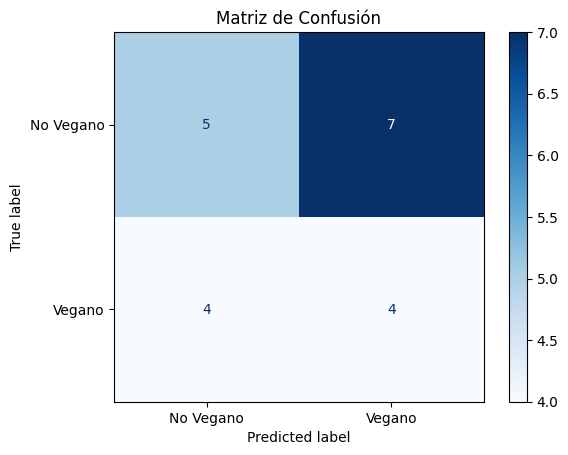

In [45]:
# 9. Matriz de confusión (antes de métricas)
cm = confusion_matrix(y_3_test, y_3_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Vegano', 'Vegano'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


# 10. Métricas
accuracy = accuracy_score(y_3_test, y_3_pred)
recall = recall_score(y_3_test, y_3_pred)

print("Precisión (accuracy):", accuracy)
print("Sensibilidad (recall para clase 'Vegano'):", recall)


Precisión (accuracy): 0.45
Sensibilidad (recall para clase 'Vegano'): 0.5


In [51]:
# 10. Predicción para nuevo individuo
nuevo_3 = pd.DataFrame({
    'servings': [5],
    'readyInMinutes': [50],
    'healthScore': [80],
    'glutenFree': [True],
    'veryHealthy': [True]
})

resultado = model.predict(nuevo_3)
print("¿Sera Vegano?", "Sí" if resultado[0] == 1 else "No")

¿Sera Vegano? No


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Paso 2: Cargar el dataset
data_4 = pd.read_csv("data/recetas.csv")
print("Shape:", data_4.shape)
data_4.head()

Shape: (100, 16)


,title,servings,readyInMinutes,cookingMinutes,preparationMinutes,healthScore,spoonacularScore,pricePerServing,cheap,dairyFree,glutenFree,sustainable,vegan,vegetarian,veryHealthy,veryPopular
0,Red Lentil Soup with Chicken and Turnips,8,55,45.0,10.0,100.0,99.428001,300.45,False,True,True,False,False,False,True,True
1,Asparagus and Pea Soup: Real Convenience Food,2,20,NaN,NaN,100.0,99.417381,178.37,False,True,True,False,True,True,True,False
2,Garlicky Kale,2,45,NaN,NaN,83.0,98.943375,69.09,False,True,True,False,True,True,True,False
3,Slow Cooker Beef Stew,6,490,480.0,10.0,100.0,98.848091,270.41,False,True,True,False,False,False,True,False
4,Red Kidney Bean Jambalaya,6,45,NaN,NaN,96.0,98.818451,168.43,False,True,True,False,True,True,True,False


In [34]:
# 1. Selección de variables predictoras (X) y objetivo (y)
X_4 = data_4[["veryHealthy", "glutenFree", "healthScore","servings", "readyInMinutes"]]
y_4 = data_4["vegan"]

In [35]:
X_4

,veryHealthy,glutenFree,healthScore,servings,readyInMinutes
0,True,True,100.0,8,55
1,True,True,100.0,2,20
2,True,True,83.0,2,45
3,True,True,100.0,6,490
4,True,True,96.0,6,45
...,...,...,...,...,...
95,True,True,100.0,1,15
96,True,True,100.0,8,45
97,True,True,90.0,2,45
98,True,False,100.0,1,45


In [38]:
y_4

0     False
1      True
2      True
3     False
4      True
      ...  
95     True
96    False
97     True
98     True
99    False
Name: vegan, Length: 100, dtype: bool

In [48]:
# 4. Preprocesamiento: escalar y codificar
columnas_categoricas_4 = ['veryHealthy', 'glutenFree']
columnas_numericas_4 = ['healthScore', 'servings', 'readyInMinutes']

X_4 = data_4[["veryHealthy", "glutenFree", "healthScore","servings", "readyInMinutes"]]

preprocesador_4 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas_4),
    ('cat', OneHotEncoder(), columnas_categoricas_4)
])

In [49]:
modelo_4 = Pipeline(steps=[
    ('preprocesamiento', preprocesador_4),
    ('clasificador', LogisticRegression())
])

In [50]:
# 6. Dividir en train/test
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)
modelo_4.fit(X_4_train, y_4_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['healthScore', 'servings',
                                                   'readyInMinutes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['veryHealthy',
                                                   'glutenFree'])])),
                ('clasificador', LogisticRegression())])

In [52]:
# 8. Predicción
y_4_pred = modelo_4.predict(X_4_test)
y_4_pred

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False])

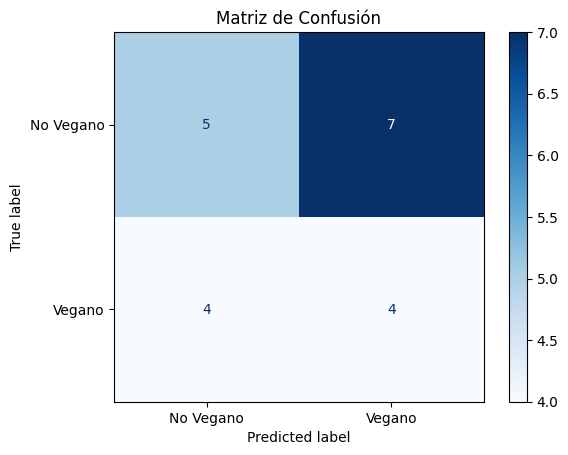

In [53]:
# 9. Matriz de confusión (antes de métricas)
cm = confusion_matrix(y_4_test, y_4_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Vegano', 'Vegano'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


# 10. Métricas
accuracy = accuracy_score(y_4_test, y_4_pred)
recall = recall_score(y_4_test, y_4_pred)

print("Precisión (accuracy):", accuracy)
print("Sensibilidad (recall para clase 'Vegano'):", recall)

Precisión (accuracy): 0.45
Sensibilidad (recall para clase 'Vegano'): 0.5


In [55]:
# 10. Predicción para nuevo individuo
nuevo_4 = pd.DataFrame({
    'servings': [5],
    'readyInMinutes': [50],
    'healthScore': [80],
    'glutenFree': [True],
    'veryHealthy': [True]
})

resultado_4 = modelo_4.predict(nuevo_4)
print("¿Sera Vegano?", "Sí" if resultado[0] == 1 else "No")

¿Sera Vegano? No
